In [36]:
import os
import re

def transfer_sentence(sen):
    sen = sen.strip()
    if '(' in sen and ')' in sen:
        pattern = r"(\d+\. )(.*?>) .*? \((.*?)\)"
        replacement = r"\2 \3"
        result = re.sub(pattern, replacement, sen)
    else:
        pattern = r"(\d+\. )(.*?>) (.*?)"
        replacement = r"\2 \3"
        result = re.sub(pattern, replacement, sen)
    return result

hash = {}
idiom_dir = '/home/jupyter/poetry-env/data/chatgpt_idiom_result'
files = os.listdir(idiom_dir)
files = [file for file in files if file.endswith('txt')]

cnt = 0
cnt_list = []
for f in files:
    f_path = os.path.join(idiom_dir, f)
    
    with open(f_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    lines = [line.strip() for line in lines]
    
    for i in range(len(lines)):
        if len(lines[i]) > 0 and '>' in lines[i]:
            filtered_sen = transfer_sentence(lines[i])
            splits = filtered_sen.split('>')
            korean = splits[0].strip()
            korean = splits[0].strip()
            pattern = r"(\d+\.)(.*?)"
            replacement = r"\2"
            korean = re.sub(pattern, replacement, korean).strip()
            english = splits[1].strip()
            
            if korean not in hash:
                hash[korean] = english
                cnt += 1
    cnt_list.append(cnt)
                

In [37]:
print(len(cnt_list))

9002


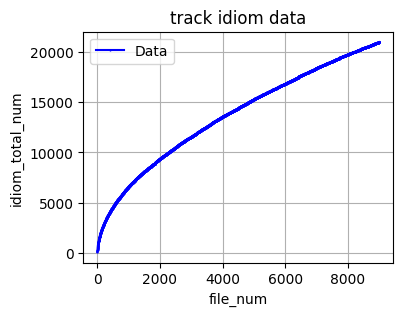

In [38]:
import matplotlib.pyplot as plt

def plot_graph(x, y):
    plt.figure(figsize=(4, 3))
    plt.plot(x, y, marker='.', linestyle='-',markersize=1, color='b', label='Data')
    plt.xlabel('file_num')
    plt.ylabel('idiom_total_num')
    plt.title('track idiom data')
    plt.legend()
    plt.grid(True)
    plt.show()

# 예제 리스트
gx = list(range(1,len(cnt_list)+1))
gy = cnt_list

plot_graph(gx, gy)